In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/spanish_wines.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.shape

(7500, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
#First we replace the object values fron null to imputer mode
cat_col=df.select_dtypes(include=["O"]).columns
print(cat_col)

Index(['winery', 'wine', 'year', 'country', 'region', 'type'], dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
#Converting the null values from the respective features
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_mode.fit(df[cat_col])
df[cat_col] = imputer_mode.transform(df[cat_col])

In [ ]:
df.isnull().sum()

winery            0
wine              0
year              0
rating            0
num_reviews       0
country           0
region            0
price             0
type              0
body           1169
acidity        1169
dtype: int64

In [ ]:
# Replacing the numerical missing values from mean value
num_col=df.select_dtypes(include=("int64","float64")).columns
num_col

Index(['rating', 'num_reviews', 'price', 'body', 'acidity'], dtype='object')

In [ ]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(df[num_col])
df[num_col] = imputer_mean.transform(df[num_col])

In [ ]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [ ]:
#Dealing with nulls year column
df['year'].fillna(2017,inplace=True)

#Transforming qualitative to quantitatives
df['year'] = df['year'].astype(str).str.replace('N.V.','2017').astype(int)

In [ ]:
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58.0,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31.0,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793.0,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705.0,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309.0,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209.0,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201.0,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926.0,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643.0,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630.0,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


## **DATA VISUALIZATION**

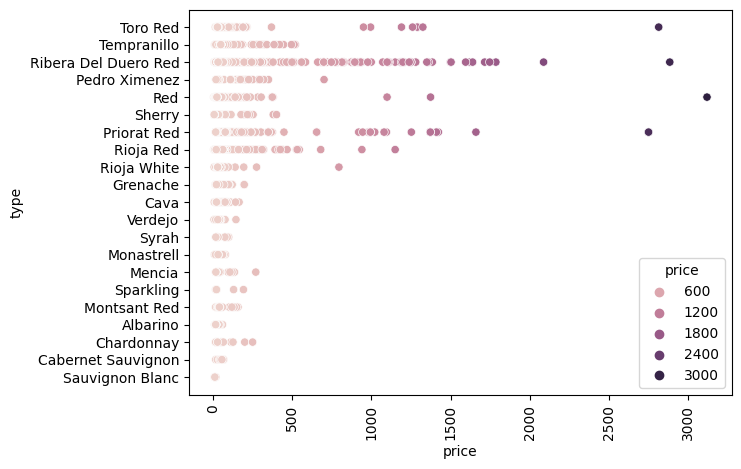

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x= df['price'], y=df['type'], hue=df['price'])
plt.xticks(rotation = 90)
plt.show()

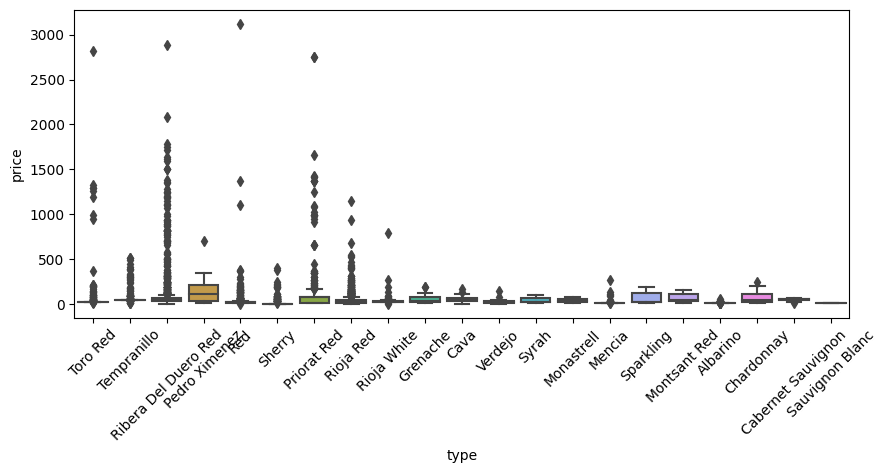

In [ ]:
#The boxplots are very close to each other so its quite hard to make a inference,
#but based on the boxplot, the type of wine as a little to no relationship on the wines prices
fig, ax = plt.subplots(ncols=1, figsize=(10,4))
sns.boxplot(y='price', x='type', data=df, ax=ax)
plt.xticks(rotation=45)
plt.show()

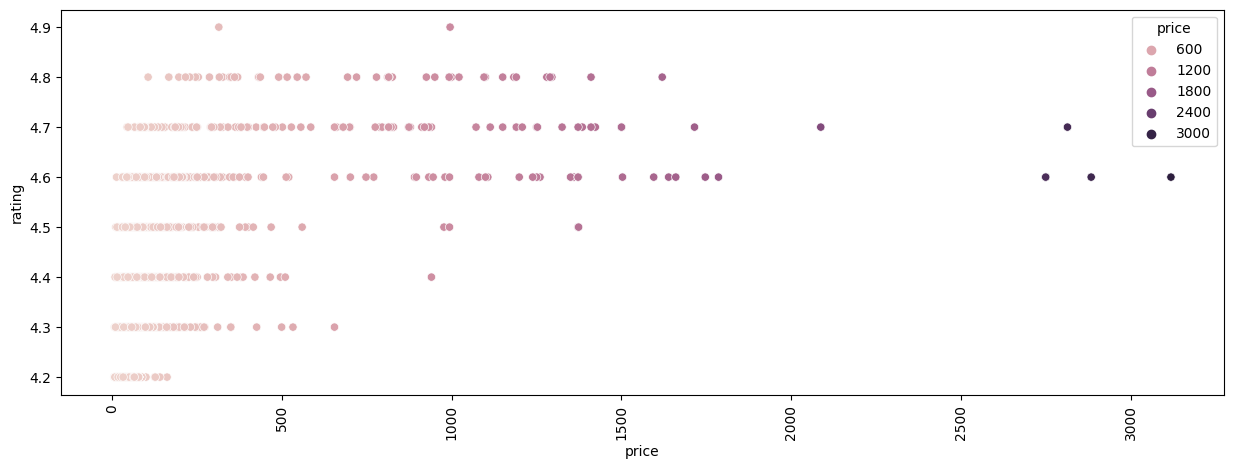

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= df['price'], y=df['rating'], hue=df['price'])
plt.xticks(rotation = 90)
plt.show()


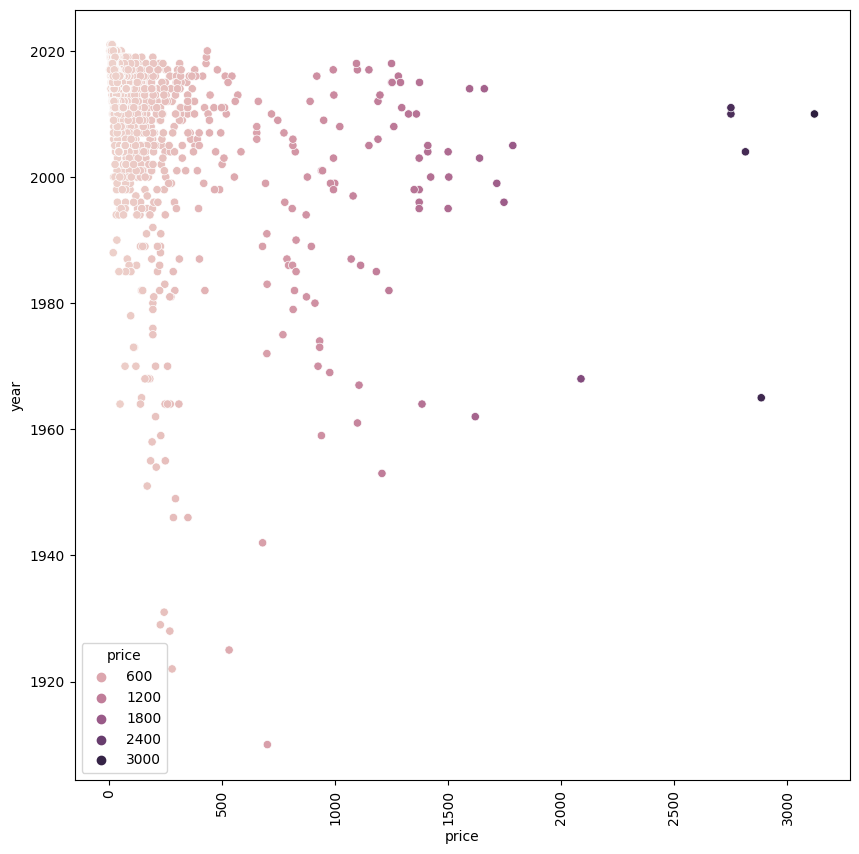

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x= df['price'], y=df['year'], hue=df['price'])
plt.xticks(rotation = 90)
plt.show()

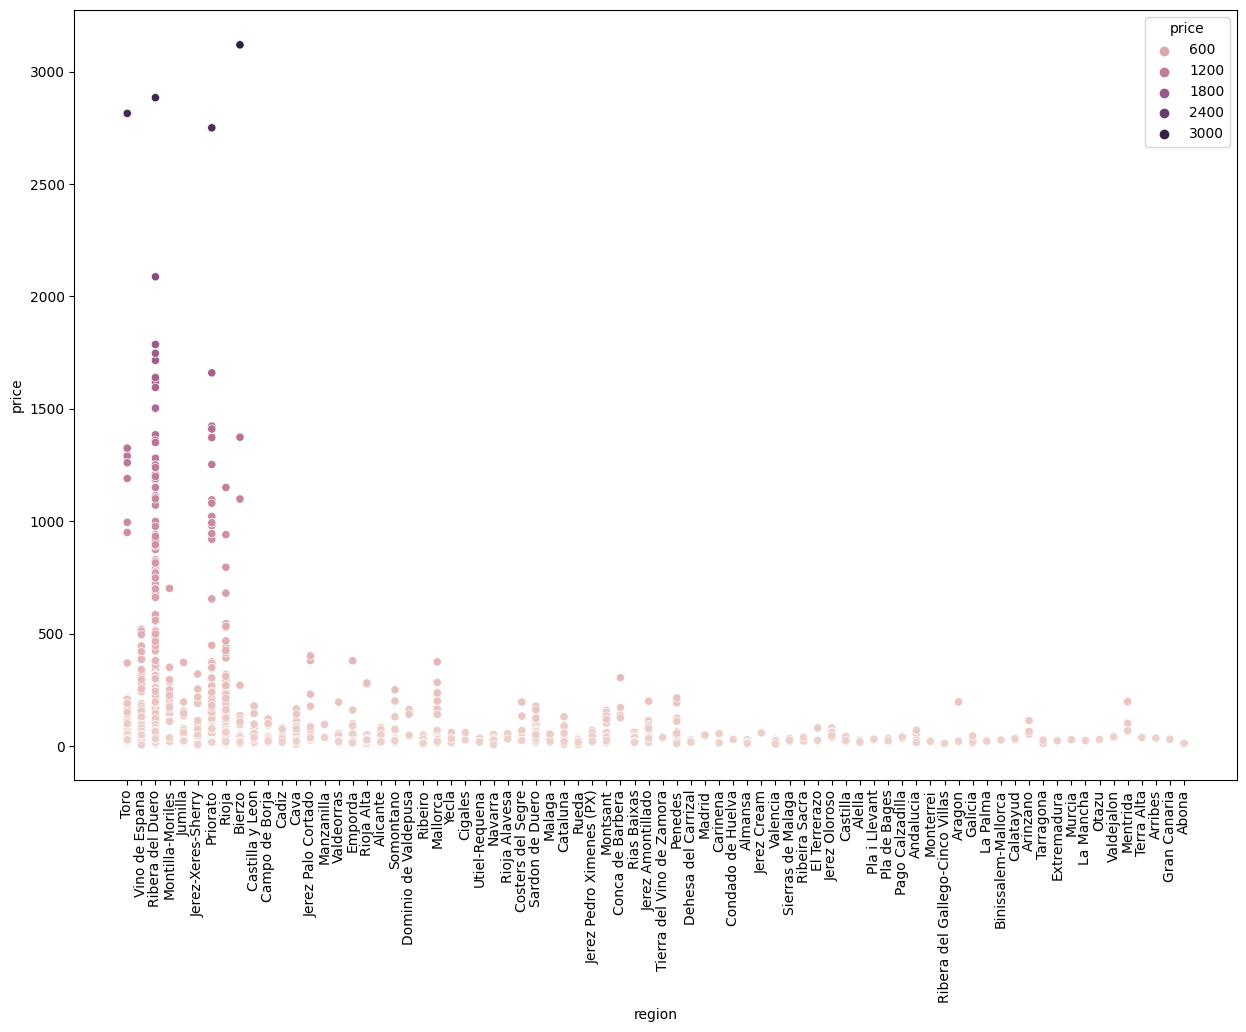

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x= df['region'], y=df['price'], hue=df['price'])
plt.xticks(rotation = 90)
plt.show()

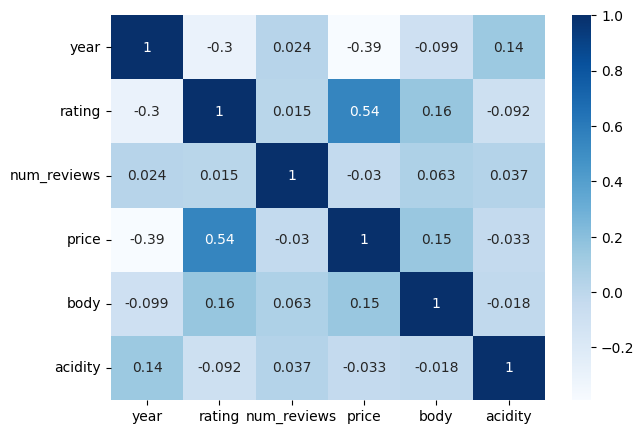

In [ ]:
#The price and rating column has a positive correlation which means that when the rating is high,
#its more likely that the price is also high, which make sense (but not in all cases).
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True, cmap="Blues")
plt.show()

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '−500'),
  Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500')])

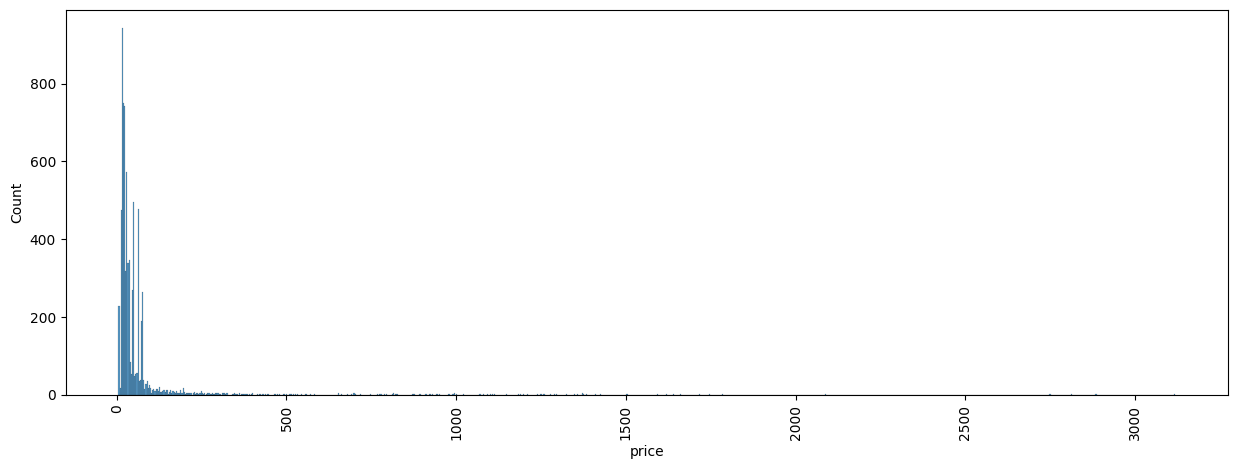

In [ ]:
fig, ax = plt.subplots(ncols=1, figsize=(15,5))
sns.histplot(x='price', data=df, ax=ax)
plt.xticks(rotation=90)
#plt.show()

In [ ]:
#Converting the catecorical data into numarical data
df.select_dtypes(include=("O")).columns

Index(['winery', 'wine', 'country', 'region', 'type'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
print('Categorical columns: ')
for col in df.columns:
    if df[col].dtype == 'object':
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str))

Categorical columns: 
winery
wine
country
region
type


In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58.0,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31.0,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793.0,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705.0,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309.0,0,57,778.06,11,5.0,3.0


In [ ]:
#outliers removal
cnames=["wine","year","rating","num_reviews","region","price","type","body","acidity"]

In [ ]:
def contineous_data(i):
  if df[i].dtype!='object':
    print("----------------------------------------------------------------------------")
    sns.boxplot(df[i])
    plt.title("Boxplot of "+str(i))
    plt.show()
    plt.title("histrogram of"+str(i))
    df[i].plot.hist(bins=20)
    plt.show

----------------------------------------------------------------------------


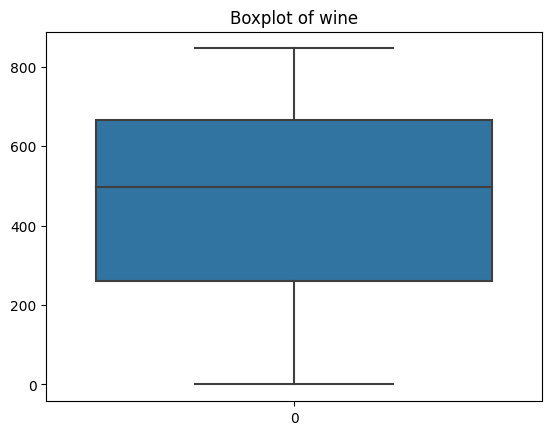

----------------------------------------------------------------------------


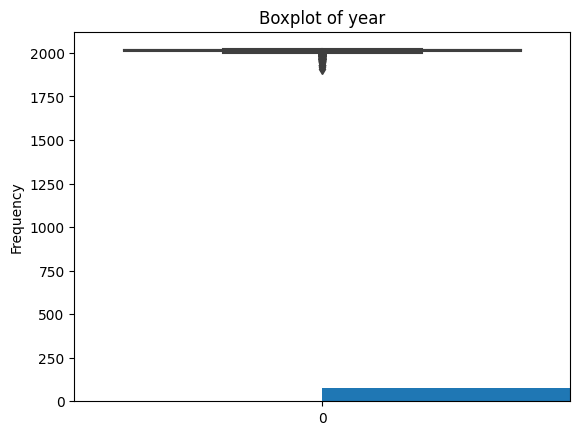

----------------------------------------------------------------------------


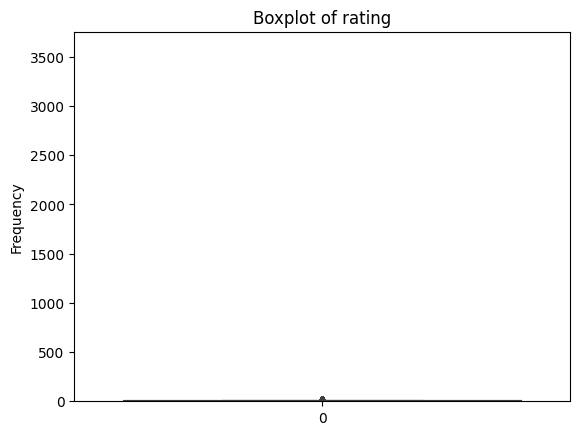

----------------------------------------------------------------------------


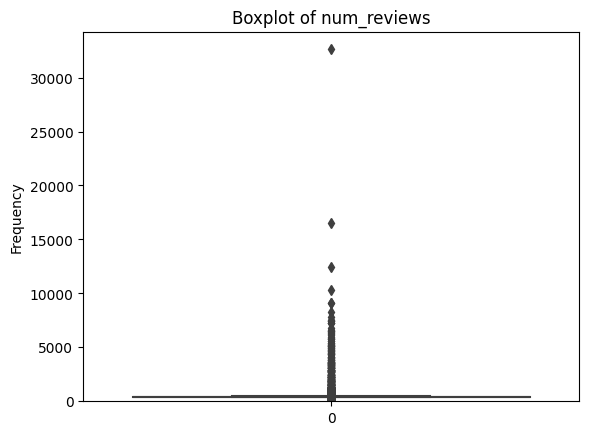

----------------------------------------------------------------------------


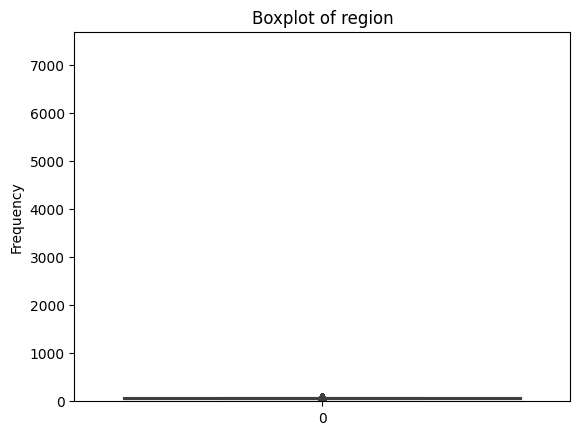

----------------------------------------------------------------------------


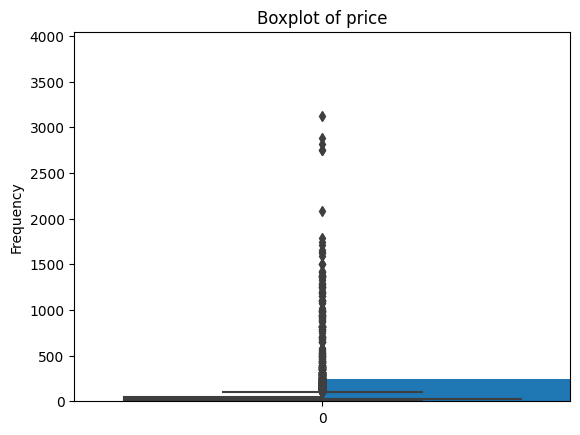

----------------------------------------------------------------------------


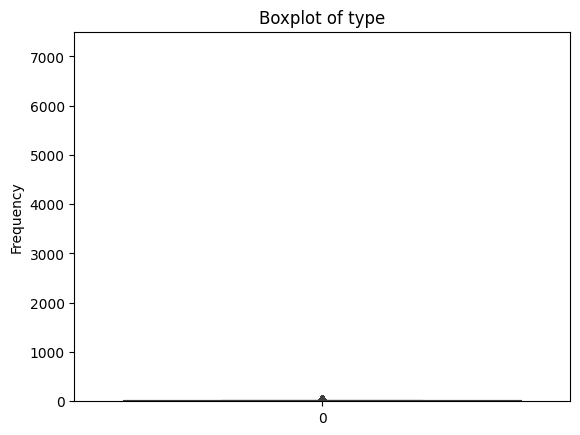

----------------------------------------------------------------------------


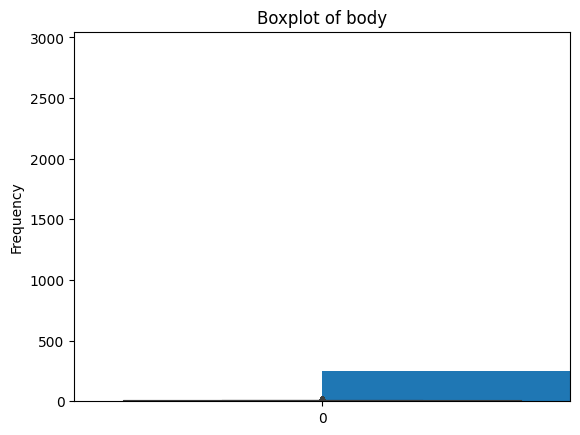

----------------------------------------------------------------------------


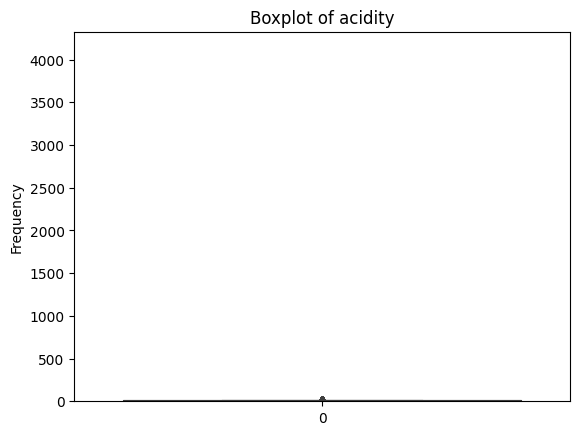

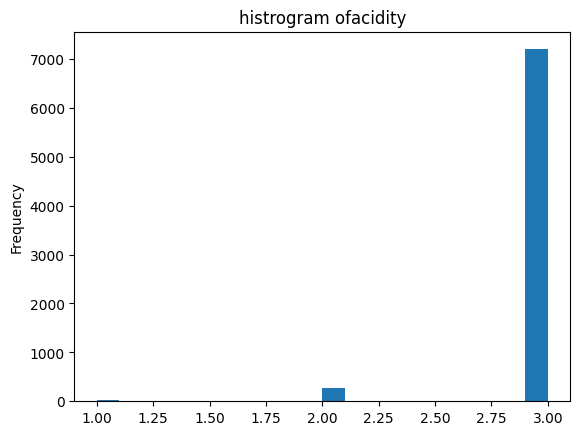

In [ ]:
for k in cnames:
   contineous_data(i=k)

In [ ]:
for k in list(df.columns):
  IQR=np.percentile(df[k],75)-np.percentile(df[k],25)
  outlier_top=np.percentile(df[k],75)+ 1.5*IQR
  outlier_bottom=np.percentile(df[k],25)-1.5 *IQR
  df[k]=np.where(df[k]>outlier_top,outlier_top,df[k])
  df[k]=np.where(df[k]<outlier_bottom,outlier_bottom,df[k])

In [ ]:
def contineous_data(i):
  if df[i].dtype!='object':
    print("-----------------------------------------------------------------------")
    sns.boxplot(df[i])
    plt.title("Boxplot of "+str(i))
    plt.show()
    plt.title("histrogram of"+str(i))
    df[i].plot.hist(bins=20)
    plt.show()

-----------------------------------------------------------------------


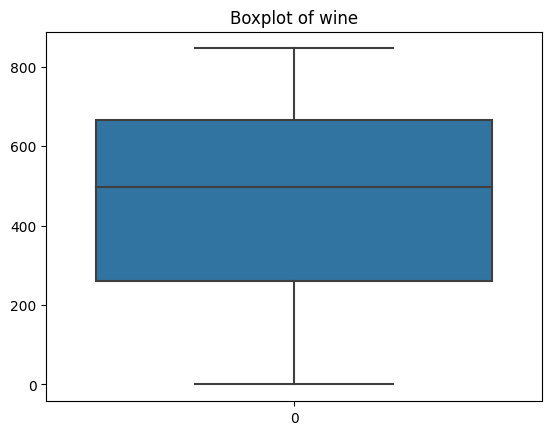

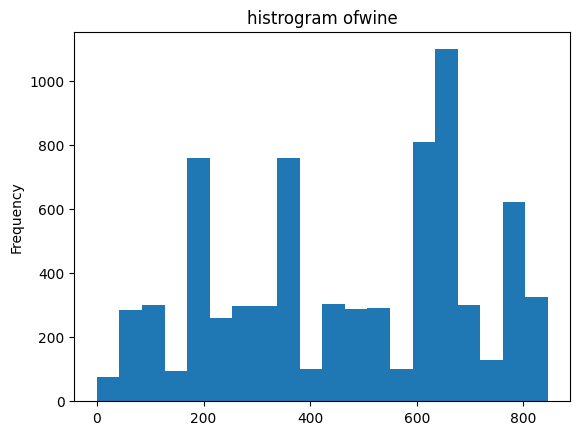

-----------------------------------------------------------------------


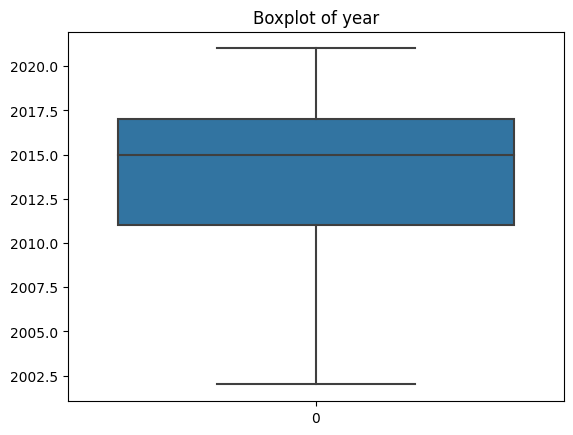

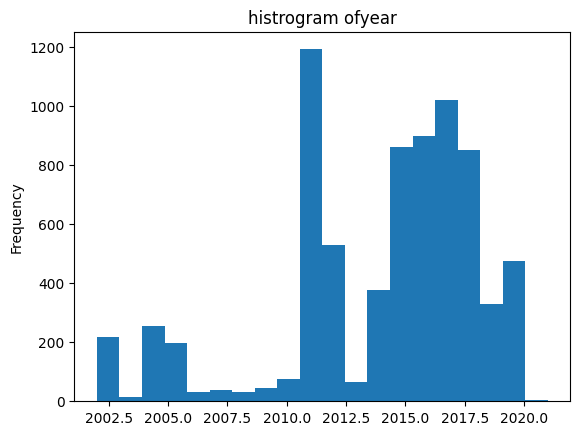

-----------------------------------------------------------------------


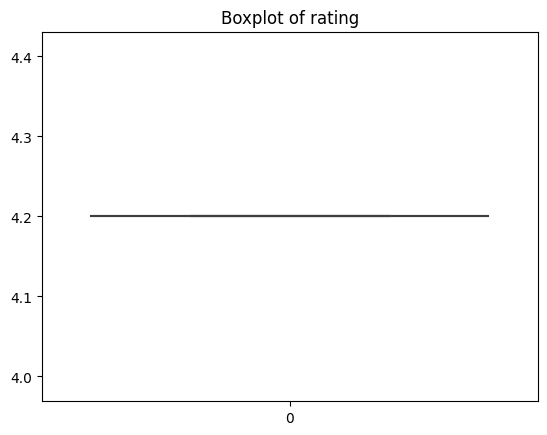

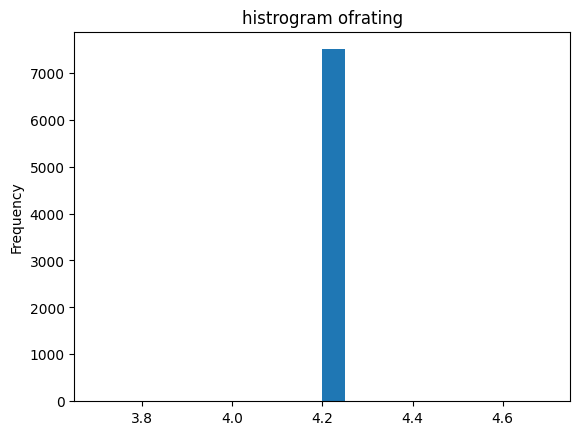

-----------------------------------------------------------------------


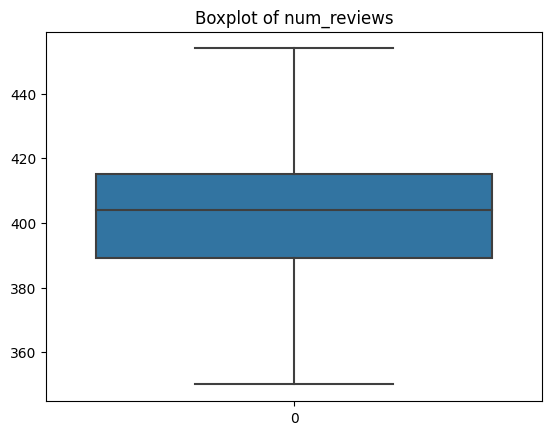

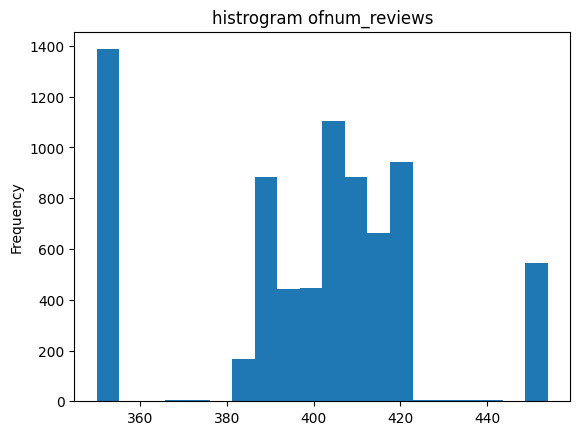

-----------------------------------------------------------------------


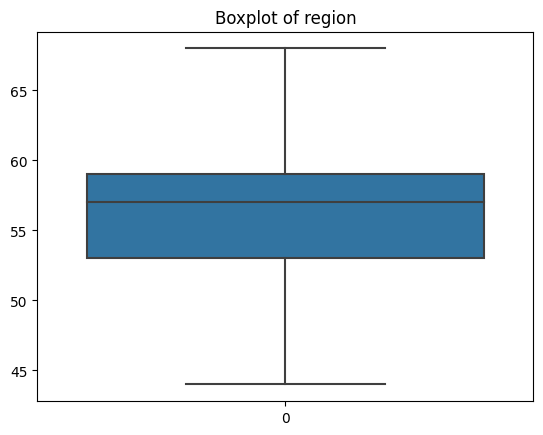

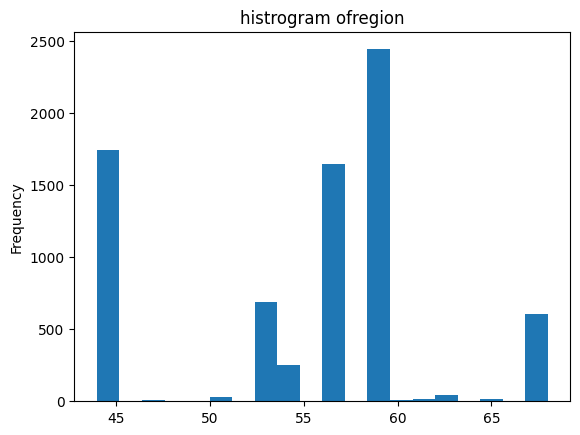

-----------------------------------------------------------------------


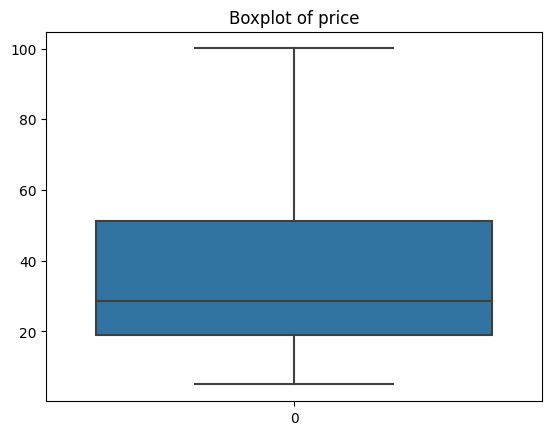

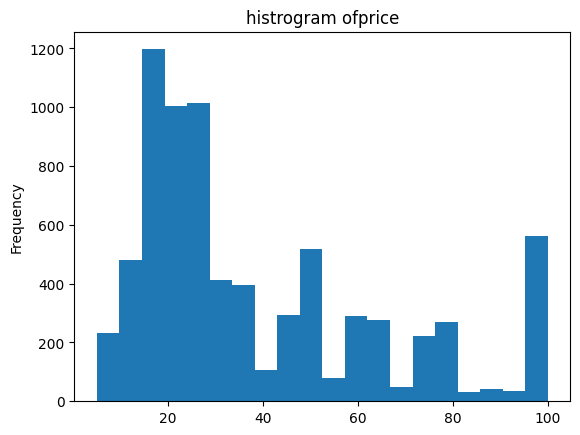

-----------------------------------------------------------------------


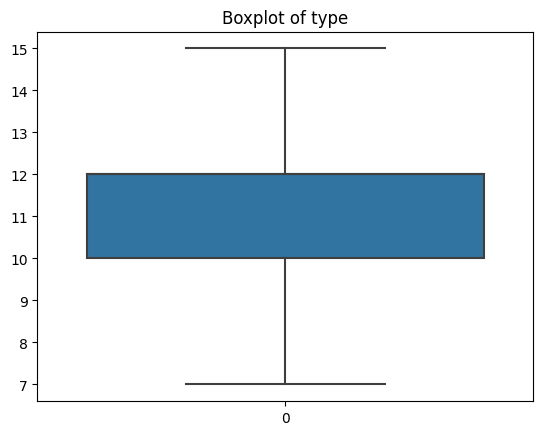

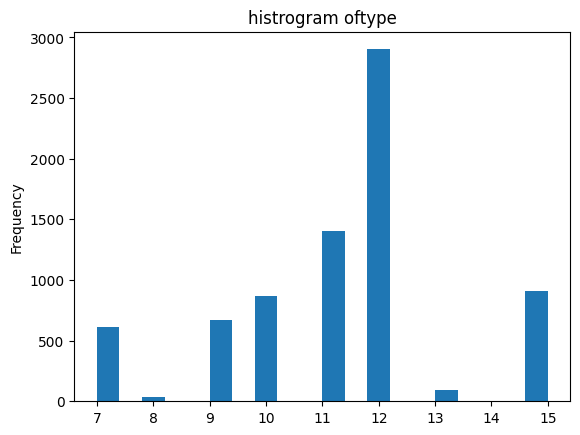

-----------------------------------------------------------------------


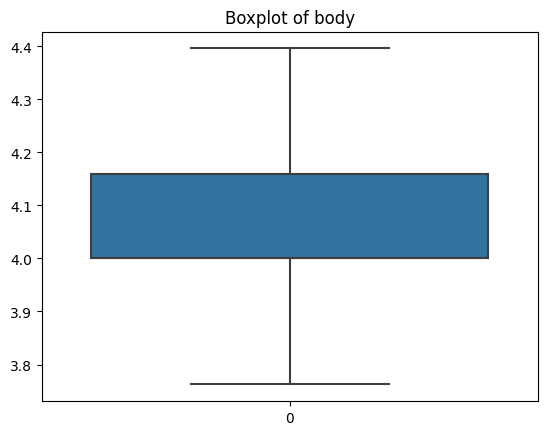

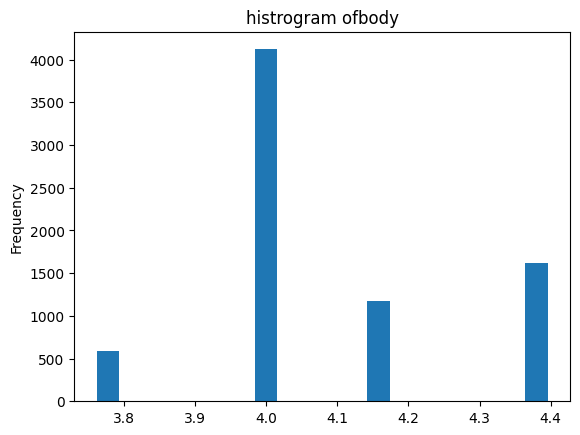

-----------------------------------------------------------------------


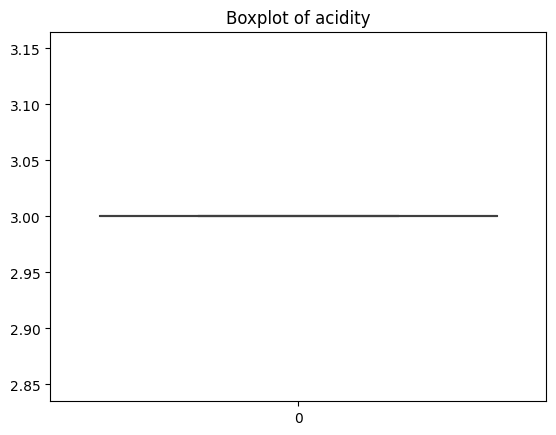

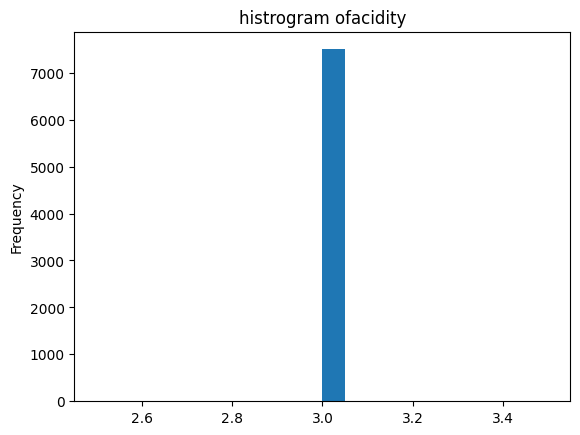

In [ ]:
for k in cnames:
  contineous_data(i=k)

In [ ]:
#Converting the categorical data into numerical data
df.select_dtypes(include=("O")).columns

Index([], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
# 'winery', 'wine',  'country', 'region', 'type'

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(int))

In [ ]:
df[col].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   float64
 1   wine         7500 non-null   float64
 2   year         7500 non-null   float64
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   float64
 5   country      7500 non-null   float64
 6   region       7500 non-null   float64
 7   price        7500 non-null   float64
 8   type         7500 non-null   float64
 9   body         7500 non-null   float64
 10  acidity      7500 non-null   float64
dtypes: float64(11)
memory usage: 644.7 KB


In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422.0,759.0,2013.0,4.2,350.0,0.0,68.0,100.025,15.0,4.396067,3.0
1,33.0,819.0,2018.0,4.2,350.0,0.0,68.0,100.025,15.0,4.000000,3.0
2,447.0,778.0,2009.0,4.2,454.0,0.0,57.0,100.025,11.0,4.396067,3.0
3,447.0,778.0,2002.0,4.2,454.0,0.0,57.0,100.025,11.0,4.396067,3.0
4,447.0,778.0,2002.0,4.2,454.0,0.0,57.0,100.025,11.0,4.396067,3.0


In [ ]:
df.drop('country',axis=1)

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,422.0,759.0,2013.0,4.2,350.0,68.0,100.025,15.0,4.396067,3.0
1,33.0,819.0,2018.0,4.2,350.0,68.0,100.025,15.0,4.000000,3.0
2,447.0,778.0,2009.0,4.2,454.0,57.0,100.025,11.0,4.396067,3.0
3,447.0,778.0,2002.0,4.2,454.0,57.0,100.025,11.0,4.396067,3.0
4,447.0,778.0,2002.0,4.2,454.0,57.0,100.025,11.0,4.396067,3.0
...,...,...,...,...,...,...,...,...,...,...
7495,159.0,619.0,2016.0,4.2,392.0,59.0,19.980,12.0,4.000000,3.0
7496,158.0,440.0,2018.0,4.2,390.0,53.0,16.760,9.0,4.000000,3.0
7497,334.0,302.0,2017.0,4.2,390.0,44.0,24.450,10.0,4.000000,3.0
7498,316.0,342.0,2011.0,4.2,389.0,57.0,64.500,11.0,4.396067,3.0


## **SPLITTING THE DATA**

In [ ]:
# Spiliting the data into x and y
x=df.drop("price",axis=1)
y=df["price"]

In [ ]:
x.shape

(7500, 10)

In [ ]:
y.shape

(7500,)

In [ ]:
# Spiliting the data into train test spilit

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)


In [ ]:
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (5250, 10)
x_test shape: (2250, 10)
y_train shape: (5250,)
y_test shape: (2250,)


In [ ]:
# Standardised our data by using StandardScaler
from sklearn.preprocessing import MinMaxScaler
std=MinMaxScaler()
x_train_scaled=std.fit_transform(x_train)
x_test_scaled=std.transform(x_test)


In [ ]:
x_train_scaled

array([[0.94560669, 0.4035503 , 0.47368421, ..., 0.5       , 1.        ,
        0.        ],
       [0.69665272, 0.35621302, 0.78947368, ..., 0.375     , 0.625     ,
        0.        ],
       [0.65899582, 0.4035503 , 0.47368421, ..., 0.5       , 1.        ,
        0.        ],
       ...,
       [0.79916318, 0.58579882, 0.47368421, ..., 0.625     , 0.375     ,
        0.        ],
       [0.06694561, 0.93372781, 0.73684211, ..., 1.        , 0.375     ,
        0.        ],
       [0.65899582, 0.4035503 , 0.47368421, ..., 0.5       , 1.        ,
        0.        ]])

In [ ]:
x_test_scaled

array([[0.85355649, 0.06745562, 0.52631579, ..., 0.625     , 0.375     ,
        0.        ],
       [0.66108787, 0.30650888, 0.89473684, ..., 1.        , 1.        ,
        0.        ],
       [0.06694561, 0.93372781, 0.73684211, ..., 1.        , 0.625     ,
        0.        ],
       ...,
       [0.60251046, 0.13964497, 0.78947368, ..., 1.        , 0.375     ,
        0.        ],
       [0.80125523, 0.91360947, 0.94736842, ..., 0.625     , 0.625     ,
        0.        ],
       [0.02719665, 0.10295858, 0.10526316, ..., 0.625     , 0.375     ,
        0.        ]])

## **MODEL BUILDING**

In [ ]:
from sklearn.metrics import accuracy_score ,r2_score,mean_squared_error

In [ ]:
#LinearRegression
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train_scaled,y_train)
LR_predict=model1.predict(x_test_scaled)
print("Accuracy score:",r2_score(y_test,LR_predict)*100)
print("Mean squared error :",mean_squared_error(y_test,LR_predict)) #average of the square of the errors(0 to infinity)

Accuracy score: 46.221247229703245
Mean squared error : 360.7556011240706


In [ ]:
#SVR
from sklearn.svm import SVR
model2=SVR(kernel="poly",degree=6, C=2.0, epsilon=0.3)
model2.fit(x_train_scaled,y_train)
svr_pred=model2.predict(x_test_scaled)
model2.score(x_test_scaled,y_test)

0.5603598147659861

In [ ]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))


0.6207380317619383


In [ ]:
#Random forest
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor()
model3.fit(x_train_scaled,y_train)
RFR_pred=model3.predict(x_test_scaled)

print("Accuracy score:",r2_score(y_test,RFR_pred)*100)
print("Mean squared error :",mean_squared_error(y_test,RFR_pred))

Accuracy score: 79.38283403679266
Mean squared error : 138.30291178934962


In [ ]:
#K-neighbors regressor
from sklearn.neighbors import KNeighborsRegressor
model4=KNeighborsRegressor(n_neighbors=10)
model4.fit(x_train_scaled,y_train)
KNN_pred=model4.predict(x_test_scaled)
print(r2_score(y_test,KNN_pred))


0.7514102161731131


In [ ]:
#XGB regressor
from xgboost import XGBRegressor
xgr = XGBRegressor(n_estimators=2450, max_depth=9, eta=0.01, subsample=0.9, colsample_bytree=0.6) # Hyperparameter tuning
xgr.fit(x_train_scaled,y_train)
xgr_pred=xgr.predict(x_test_scaled)
print(r2_score(y_test,xgr_pred))
print("Accuracy score:",r2_score(y_test,xgr_pred)*100)
print("Mean squared error :",mean_squared_error(y_test,xgr_pred))

0.8554868313898392
Accuracy score: 85.54868313898392
Mean squared error : 96.9415100327457


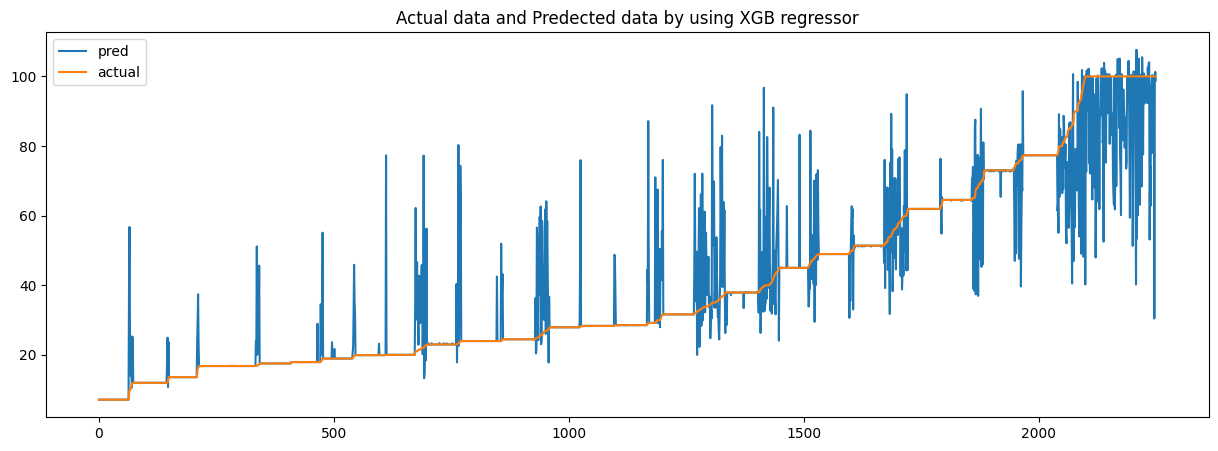

In [ ]:
preds = pd.DataFrame({'y_pred': xgr_pred, 'y_test':y_test})
preds = preds.sort_values(by='y_test')
preds = preds.reset_index()

plt.figure(figsize=(15, 5))
plt.title("Actual data and Predected data by using XGB regressor")
plt.plot(preds['y_pred'], label='pred')
plt.plot(preds['y_test'], label='actual')
plt.legend()
plt.show()